<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/master/03_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3 - Statistics in Python (First part)



> A very basic introduction on statistics in Python. In this first introductory lesson we will just present some *Measures of Central Tendency* (median, mean and weighted mean) and *Measures of Variability* (variance and standard deviation). We will also talk about *Percentiles* and *Missing values*.

## Outline
 * [Measures of Central Tendency](#Measures-of-Central-Tendency)
   * [Median](#Median)
   * [Mean](#Mean)
   * [Weighted mean](#Weighted-mean) 
 * [Measures of Variability](#Measures-of-Variability)
   * [Variance](#Variance)
   * [Standard deviation](#Standard-deviation)
 * [Percentiles](#Percentiles)
 * [Missing values](#Missing-values)


<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

For this very basic introduction on statistics in Python we will leverage some NumPy functions. Let's import this package with its typical alias:

In [1]:
# Load package with its corresponding alias
import numpy as np

<div class="alert alert-block alert-info"><b>Tip:</b> We will devote a whole boot camp session to NumPy on October 4 <sup>th</sup> (15:00-16:00).
</div>

# Measures of Central Tendency

The measures of central tendency show the central or middle values of datasets. There are several definitions of what's considered to be the center of a data set. In this tutorial, you'll learn how to identify and calculate these measures of central tendency. Let's create a list with some arbitrary values to work with along the upcoming sections:

In [2]:
# Create list with some floats and integers
x = [8.0, 1, 2.5, 4, 28.0]

## Median

The sample median is the middle element of a sorted dataset. We can compute the median using the NumPy function [`np.median()`](https://numpy.org/doc/stable/reference/generated/numpy.median.html):

In [3]:
# Compute the median of "x"
x_median = np.median(x)

# Return "x_median"
print(x_median)

4.0


## Mean

The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a data set:

$$\bar{x} = \frac{1}{N}\sum^{N}_{i=1}{x_i}$$

You have already seen that you can calculate the mean using the Python built-ins `sum()` and `len()`, without importing packages:

In [4]:
# Compute and store the mean of "x" in "x_mean_builtin"
x_mean_builtin = sum(x) / len(x)

# Return "x_mean_builtin"
print(x_mean_builtin)

8.7


You can alternatively use the NumPy function [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html):

In [5]:
# Compute and store the mean of "x" in "x_mean"
x_mean = np.mean(x)

# Return "x_mean"
print(x_mean)

8.7


## Weighted mean

The weighted mean, also called the weighted arithmetic mean or weighted average, is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result:

$$\bar{x}_{w} = \frac{\sum^{N}_{i=1}{x_i w_i}}{\sum^{N}_{i=1}{w_i}}$$

The weighted mean is very handy when you need the mean of a dataset containing items that occur with given relative frequencies. For example, remember the values stores in our list `x`, say that you have a collection of values in which 60% of all items are equal to `8.0`, 20% are equal to `1`, 10% are equal to `2.5`, 8% are equal to `4` and 2% are equal to `28.0`. You can calculate the mean of such a collection using the NumPy function [`np.average()`](https://numpy.org/doc/stable/reference/generated/numpy.average.html):

In [6]:
# Create a list of weights for the values stored in "x"
w = [0.60, 0.20, 0.10, 0.08, 0.02]

# Compute and store the weighted mean in "x_weighted_mean" and the regular mean in "x_mean"
x_weighted_mean = np.average(x, weights=w)
x_mean = np.average(x)

# Return "x_weighted_mean" and "x_mean"
print(x_weighted_mean)
print(x_mean)

6.130000000000001
8.7


Note that the "regular" mean is a particular case of weighted mean on which all weights are identical.

# Measures of Variability

The measures of central tendency aren't sufficient to describe data. You'll also need the measures of variability that quantify the spread of data points.

## Variance

The variance quantifies the spread of the data. It shows numerically how far the data points are from the mean:

$$\sigma^2 = \frac{1}{N-1}\sum^{N}_{i=1}{\left(x_i - \bar{x}\right)^2}$$

As usual, NumPy has a function for this purpose called [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html):

In [7]:
# Compute and store the (biased) sample variance of "x" in "x_var_bias"
x_var_bias = np.var(x, ddof=0)

# Compute and store the (unbiased) sample variance of "x" in "x_var_unbias"
x_var_unbias = np.var(x, ddof=1)

# Return "x_var_bias" and "x_var_unbias"
print(x_var_bias)
print(x_var_unbias)

98.55999999999999
123.19999999999999


By default, [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) uses `ddof=0` (Delta Degrees of Freedom), which gives the *biased sample variance*. By changing `ddof=1` you get the *unbiased sample variance* (AKA [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)). From now on, we will use the *unbiased sample variance*.

## Standard deviation

The standard deviation is another measure of data spread. The standard deviation is often more convenient than the variance because it has the same dimension (unit) as the data points. You can compute the standard deviation just taking the square root of the variance:

$$\sigma = \sqrt{\frac{1}{N-1}\sum^{N}_{i=1}{\left(x_i - \bar{x}\right)^2}}$$

In [8]:
# Compute and store the variance of "x" in "x_var"
x_var = np.var(x, ddof=1)

# Compute and store the standard deviation of "x" in "x_std"
x_std = np.sqrt(x_var)

# Return "x_std"
print(x_std)

11.099549540409285


Alternatively, you can use the NumPy function [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html):

In [9]:
# Compute and store the standard deviation of "x" in "x_std"
x_std = np.std(x, ddof=1)

# Return "x_std"
print(x_std)

11.099549540409285


# Percentiles

Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than. The NumPy function to get your percentiles is [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html). For example, let's say we have an array of the ages of all the people that lives in a village:

In [10]:
# Create list with some ages
ages = [5, 31, 43, 48, 50, 41, 7, 11, 15, 39, 80, 82, 32, 2, 8, 6, 25, 36, 27, 61, 31]

# Compute the percentile 75 of "ages"
ages_75 = np.percentile(ages, 75)

# Return "ages_75"
print(ages_75)

43.0


The percentile 50 is the median:

In [11]:
# Check if the percentile 50 equals the median
np.percentile(ages, 50) == np.median(ages)

True

Tipycally, box plots represent five percentiles: 5 (bottom wisker), 25 (bottom box), 50 (mid box), 75 (top box) and 95 (top box):

In [12]:
# Compute the five tipycal percentiles of "ages"
np.percentile(ages, [5, 25, 50, 75, 95])

array([ 5., 11., 31., 43., 80.])

Let's check it out!

<AxesSubplot:>

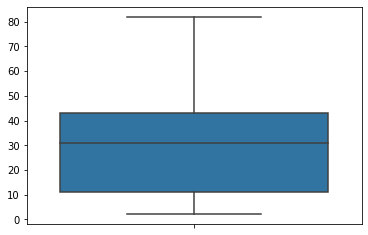

In [13]:
# Load plotting package seaborn with its corresponding alias
import seaborn as sns

# Get boxplot for "ages"
sns.boxplot(y=ages)

<div class="alert alert-block alert-info"><b>Tip:</b> We will devote a whole boot camp session to Seaborn on October 5 <sup>th</sup> (16:00-17:00).
</div>

# Missing values

In many scientific disciplines it is very common to deal with *missing values* when analyzing your data. In Python, missing values are represented as `nan`, which stands for "Not a Number". The NumPy package offers a very efficient implementation `nan` values for Python. Note that Python treats `nan`s as floats:

In [14]:
# Get the variable type of a nan
type(np.nan)

float

You should proceed with caution when computing descriptive statistics of data with missing values.

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1<sup>st</sup> code cell below, check if the mean and the median of `[1, 2, 3, 4, 5, 6]` are equal to the mean and the median of `[np.nan, 1, 2, 3, 4, 5, 6]`, respectively:
    
2) In the 2<sup>nd</sup> code cell below, do the same as before with the functions [`np.nanmean()`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) instead of [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [`np.nanmedian()`](https://numpy.org/doc/stable/reference/generated/numpy.nanmedian.html) instead of [`np.median()`](https://numpy.org/doc/stable/reference/generated/numpy.median.html)
    
</div>

In [15]:
# Compute the mean and the median of a dice



# Compute the mean and the median of a dice containing a nan



In [16]:
# Compute the mean and the median of a dice
print(np.mean([1, 2, 3, 4, 5, 6]))
print(np.median([1, 2, 3, 4, 5, 6]))

# Compute the mean and the median of a dice containing a nan
print(np.mean([np.nan, 1, 2, 3, 4, 5, 6]))
print(np.median([np.nan, 1, 2, 3, 4, 5, 6]))

3.5
3.5
nan
nan


In [17]:
# Compute the nanmean and the nanmedian of a dice



# Compute the nanmean and the nanmedian of a dice containing a nan



In [18]:
# Compute the nanmean and the nanmedian of a dice
print(np.nanmean([1, 2, 3, 4, 5, 6]))
print(np.nanmedian([1, 2, 3, 4, 5, 6]))

# Compute the nanmean and the nanmedian of a dice containing a nan
print(np.nanmean([np.nan, 1, 2, 3, 4, 5, 6]))
print(np.nanmedian([np.nan, 1, 2, 3, 4, 5, 6]))

3.5
3.5
3.5
3.5


<div class="alert alert-block alert-danger"><b>Caveat:</b>

Dealing with missing values is tricky and usually needs *data imputation* because advanced statistical analyses (like differential gene expression or machine learning) require complete data (with no missing values). Not all data sets can be imputed in the same way so there is no a "best imputation algorithm".
</div>